In [19]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

In [12]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)
    
def alice_gates(qc, psi, a):
    qc.cx(psi,a)
    qc.h(psi)
    
def measure_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    
def bob_gates(qc, qubit, crz,crx):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

<IPython.core.display.Math object>

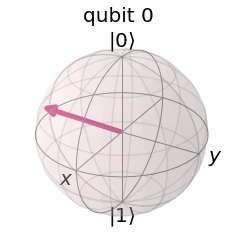

In [15]:
psi= random_state(1)

array_to_latex(psi, pretext="|\\psi\\rangle=")
plot_bloch_multivector(psi)

In [20]:
init_gate = Initialize(psi)
init_gate.label="init"

In [23]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

qc = QuantumCircuit(qr,crz,crx)

qc.append(init_gate,[0])
qc.barrier()




create_bell_pair(qc, 1, 2)

qc.barrier()

alice_gates(qc,0,1)

measure_send(qc,0,1)

bob_gates(qc,2, crz, crx)
qc.draw()

┌──────┐ ░            ░      ┌───┐ ░ ┌─┐                 
 q_0: |0>┤ init ├─░────────────░───■──┤ H ├─░─┤M├─────────────────
         └──────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐              
 q_1: |0>─────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──────────────
                  ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
 q_2: |0>─────────░──────┤ X ├─░────────────░──╫──╫──┤ X ├──┤ Z ├─
                  ░      └───┘ ░            ░  ║  ║  └─┬─┘  └─┬─┘ 
                                               ║       │   ┌──┴──┐
crz_0: 0 ══════════════════════════════════════╩═══════╪═══╡ = 1 ╞
                                                  ║ ┌──┴──┐└─────┘
crx_0: 0 ═════════════════════════════════════════╩═╡ = 1 ╞═══════
                                                    └─────┘

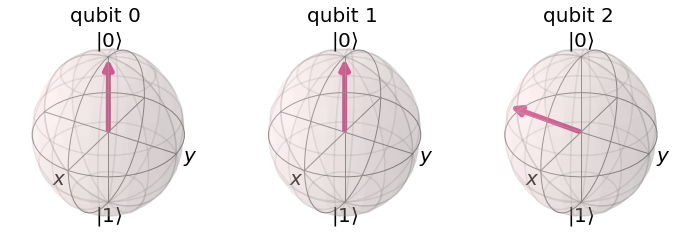

In [25]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)